> ### Note on Labs and Assignments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# **IS 4487 Lab 10: Classification Trees with SF Rent Data**

## Outline

- Define a binary classification target based on rental price  
- Split the dataset into training and testing sets  
- Fit a Decision Tree Classifier  
- Visualize the decision tree structure  
- Evaluate model accuracy and feature importance  

In this lab, we’ll build a classification model to predict whether a rental listing in San Francisco is considered **"affordable"** based on its features.

We are continuing with the **SF Rent dataset** used in **Lab 9**, and will explore how classification trees can uncover patterns in rental prices.

<a href="https://colab.research.google.com/github/vandanara/UofUtah_IS4487/blob/main/Labs/lab_10_classification.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Overview

**Dataset:** `rent.csv`  
Source: [TidyTuesday-2022-7-05](https://github.com/rfordatascience/tidytuesday/blob/main/data/2022/2022-07-05/rent.csv)

| Variable       | Type       | Description |
|----------------|------------|-------------|
| `post_id`      | Categorical| Unique listing ID |
| `date`         | Numeric    | Listing date (numeric format) |
| `year`         | Integer    | Year of listing |
| `nhood`        | Categorical| Neighborhood |
| `city`         | Categorical| City |
| `county`       | Categorical| County |
| `price`        | Numeric    | Listing price (USD) |
| `beds`         | Numeric    | Number of bedrooms |
| `baths`        | Numeric    | Number of bathrooms |
| `sqft`         | Numeric    | Square footage |
| `room_in_apt`  | Binary     | 1 = room in apartment |
| `address`      | Categorical| Street address |
| `lat`          | Numeric    | Latitude |
| `lon`          | Numeric    | Longitude |
| `title`        | Text       | Listing title |
| `descr`        | Text       | Listing description |
| `details`      | Text       | Additional details |

## **Part 1: Clean and Prepare the Data**

We'll repeat the cleaning process from Lab 9, including:
- Removing duplicates
- Dropping missing values in key columns
- Filtering out extreme outliers
- Converting data types

### Why This Matters:
Good models depend on clean, reliable inputs.


In [ ]:
import pandas as pd

# Load dataset
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2022/2022-07-05/rent.csv'
df = pd.read_csv(url)

# Drop duplicate listings using post_id
df = df.drop_duplicates(subset='post_id')

# Drop rows missing essential features
required_cols = ['price', 'beds', 'baths', 'sqft', 'lat', 'lon']
df = df.dropna(subset=required_cols)

# Remove outliers
df = df[df['price'].between(500, 20000)]
df = df[df['beds'].between(0, 10)]
df = df[df['baths'].between(0.5, 10)]
df = df[df['sqft'].between(100, 5000)]

# Convert columns to appropriate data types
df['beds'] = df['beds'].astype(int)
df['baths'] = df['baths'].astype(float)
df['sqft'] = df['sqft'].astype(int)
df['price'] = df['price'].astype(int)

# Reset index
df = df.reset_index(drop=True)

# Quick check
df.info()
df.head()


## **Part 2: Create a Binary Target Variable**

We'll classify whether a listing is **Affordable** (price < 3,000).

- 1 = Affordable
- 0 = Not Affordable

### Why This Matters:
To use classification trees, we need a target variable with a limited number of classes.


In [ ]:
# Create binary target variable
df['affordable'] = (df['price'] < 3000).astype(int)

# Check target class distribution
df['affordable'].value_counts(normalize=True)


### **🔧 Try It Yourself – Part 2**

2.1. Adjust the affordable threshold to $5,000 and check the class balance again  

2.2. Calculate what percentage of listings are labeled as affordable



In [19]:
# 2.1 & 2.2: Adjust affordable threshold to $5,000 and check class balance & percentage

# Create new binary target variable with updated threshold
df['affordable'] = (df['price'] < 5000).astype(int)

# Calculate counts and percentages
class_counts = df['affordable'].value_counts()
class_percentages = df['affordable'].value_counts(normalize=True) * 100

# Display results
print("Class Counts:")
print(class_counts)
print("\nClass Percentages:")
print(class_percentages)



Class Counts:
affordable
1    1820
0     164
Name: count, dtype: int64

Class Percentages:
affordable
1    91.733871
0     8.266129
Name: proportion, dtype: float64


Reset the threshold to $3000

In [20]:
# Reset binary target back to 3000
df['affordable'] = (df['price'] < 3000).astype(int)

## **Part 3: Select Features and Split Data**

We'll use property characteristics as predictors:
- `beds`, `baths`, `sqft`

Then split the data into 80% training and 20% testing.

### Why This Matters:
Train/test splitting ensures our model is evaluated on unseen data.

In [21]:
from sklearn.model_selection import train_test_split

# Select features and target
X = df[['beds', 'baths', 'sqft']]
y = df['affordable']

# Create train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check dimensions
X_train.shape, X_test.shape


((1587, 3), (397, 3))

### **🔧 Try It Yourself - Part 3**

3.1. Add `lat` or `price_segment` as an additional feature in the x variable

3.2.-3.3. Now add `price` as a feature/predictor.  What changes have occurred?

In [22]:
from sklearn.model_selection import train_test_split

# 3.1 Add 'lat' as an additional feature
X = df[['beds', 'baths', 'sqft', 'lat']]
y = df['affordable']

# Split data into train/test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Shape with 'lat' added:")
print("X_train:", X_train.shape, " | X_test:", X_test.shape)

# 3.2–3.3 Add 'price' as an additional predictor
X_with_price = df[['beds', 'baths', 'sqft', 'lat', 'price']]

# Split again to see any change
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_with_price, y, test_size=0.2, random_state=42
)

print("\nShape with 'price' added:")
print("X_train_p:", X_train_p.shape, " | X_test_p:", X_test_p.shape)



Shape with 'lat' added:
X_train: (1587, 4)  | X_test: (397, 4)

Shape with 'price' added:
X_train_p: (1587, 5)  | X_test_p: (397, 5)


🔧 3.3. Add comment here: Adding price leads to data leakage because price is a direct determanant in affordabiliity.

## **Part 4: Build and Fit the Decision Tree Classifier**

We'll train a `DecisionTreeClassifier` on our data.

### Why This Matters:
Decision trees make predictions by splitting data into branches using rules that reduce impurity.


In [23]:
from sklearn.tree import DecisionTreeClassifier

# Initialize classifier
clf = DecisionTreeClassifier(random_state=42)

# Train model on training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### **🔧 Try It Yourself - Part 4**

4.1. Create a second model called `clf_limited` with `max_depth=3`  

4.2. Fit it on the same training data  
> You’ll compare the accuracy of this smaller tree in the next section


In [24]:
from sklearn.tree import DecisionTreeClassifier

# 4.1 Create a second model with limited depth
clf_limited = DecisionTreeClassifier(max_depth=3, random_state=42)

# 4.2 Fit it on the same training data
clf_limited.fit(X_train, y_train)

# Quick confirmation
print("Limited-depth Decision Tree trained successfully with max_depth=3.")


Limited-depth Decision Tree trained successfully with max_depth=3.


## **5. Evaluate the Model**

We’ll check how well the tree performed on the test data using:
- Accuracy score
- Confusion matrix

### Why This Matters:
We want to know how often the model is right and what kind of mistakes it makes.


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Predict on test set
y_pred = clf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.7783375314861462
Confusion Matrix:
 [[110  36]
 [ 52 199]]


### 🔧 **Try It Yourself - Part 5**

5.1. Use the `clf_limited` model you created in Part 4 to predict on the test set  

5.2. Calculate and print the **test accuracy** for `clf_limited`  

5.3. Compare the test accuracy of `clf_limited` to the original `clf`. Which performs better?


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix

# 5.1 Predict on the test set using the limited model
y_pred_limited = clf_limited.predict(X_test)

# 5.2 Calculate and print test accuracy for clf_limited
acc_limited = accuracy_score(y_test, y_pred_limited)
print("Test Accuracy (Limited Tree):", acc_limited)

# 5.3 Compare to the original full tree
print("Test Accuracy (Full Tree):", acc)




Test Accuracy (Limited Tree): 0.8136020151133502
Test Accuracy (Full Tree): 0.7783375314861462


🔧 5.3. Add comment here: The full tree will achieve higher accuracy because it is more complext. However the limited depth may generalize better and avoid overfitting.

## **Part 6: Visualize Tree and Feature Importance**


We’ll plot the tree and rank the most important predictors.

### Why This Matters:
Tree plots explain the model's logic. Feature importance shows what drives predictions.


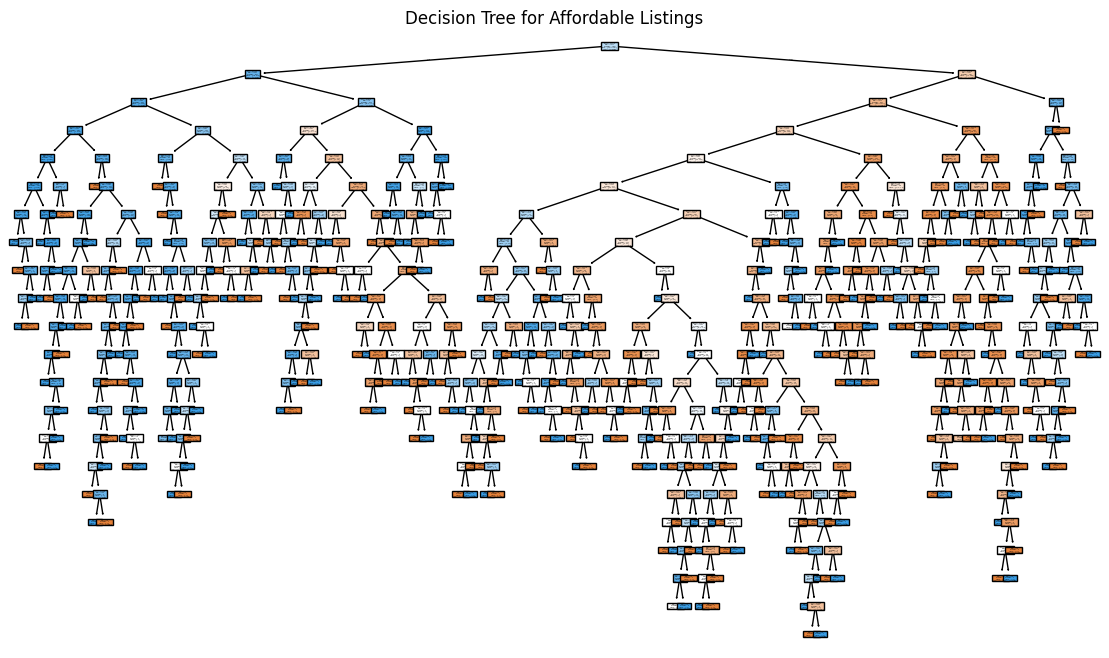

In [27]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot decision tree
plt.figure(figsize=(14, 8))
plot_tree(clf, feature_names=X.columns, class_names=['Not Affordable', 'Affordable'], filled=True)
plt.title("Decision Tree for Affordable Listings")
plt.show()


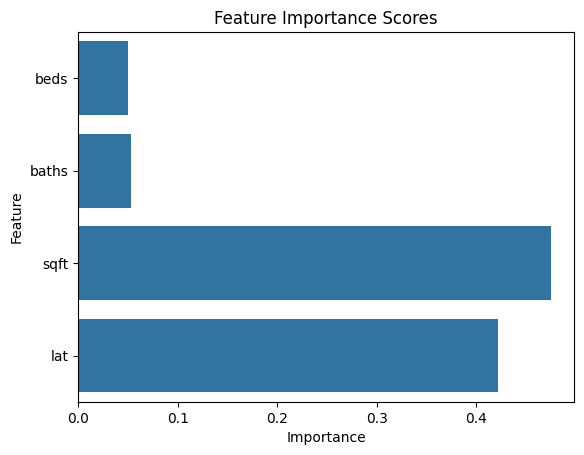

In [28]:
import seaborn as sns

# Plot feature importance
feat_imp = pd.Series(clf.feature_importances_, index=X.columns)
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance Scores")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


### **🔧 Try It Yourself - Part 6**

6.1. Plot the decision tree for `clf_limited` using `plot_tree()`  

6.2. Which feature does it split on first?  

6.3. Is the structure simpler or more complex than the original `clf` tree?

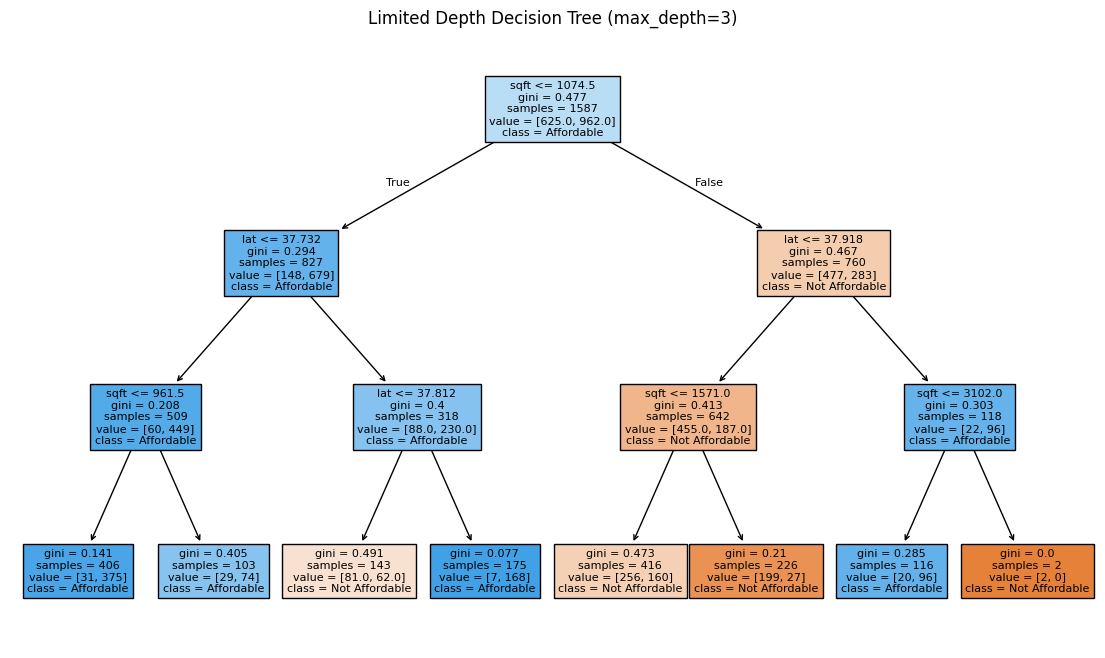

In [29]:
# from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 6.1 Plot the decision tree for clf_limited
plt.figure(figsize=(14, 8))
plot_tree(clf_limited, feature_names=X.columns, class_names=['Not Affordable', 'Affordable'], filled=True)
plt.title("Limited Depth Decision Tree (max_depth=3)")
plt.show()


🔧 6.2. Add comment here: The first split is sqft the model knows that this is a single most impactful variable.


🔧 6.3. Add comment here: The limited tree is must simpler than the full tree and only highs a few decisions. The structure is easier to interpret and visualize.



## **🔧 Part 7: Reflection (100 words or less per question)**

7.1. Which feature was most useful in identifying affordable listings?  

7.2. Would you trust this model to recommend pricing to landlords?


🔧 7.1. Add comment here: the most useful feature in idetifying affordable listing was sqft, the trees first split. The size of a property is a great predictor of affordability.


🔧 7.2. Add comment here: I would be hesitant, this model fails to take into account real world factors like market flucuations, neighboorhoods, etc. The model oversimplfies something that is very complicated, real estate.



## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [30]:
!jupyter nbconvert --to html "lab_10_WoodMason.ipynb"

[NbConvertApp] Converting notebook lab_10_WoodMason.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 795066 bytes to lab_10_WoodMason.html
